<p style="margin: 15px;">


<ul>
<li>Выбрать входные и выходные переменные.</li>
<li>Выполнить настройку параметров лингвистических переменных: определить
количество термов, типов и параметров функций принадлежности</li>
<li>Сформировать базу нечетких правил.</li>
<li>Выполнить оценку качества полученной нечеткой системы</li>
</ul>
</p>


In [140]:
import pandas as pd
import skfuzzy.control as control
import skfuzzy as fuzzy
import numpy as np


# считаем данные и поределим входные и выходные переменные
data = pd.read_csv("./csv/option4.csv")
data.info()

data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type          

<p style="margin: 15px;">
Так как мы предсказываем инсульт, то входными переменными будут самые, пожалуй, важные критерии - возраст, уровень сахара в крови, ИМТ, гипертония (ее наличие/отсутствие) и сердечный приступ (тоже его наличие/отсутствие)<br><br>а вот ВЫходной переменной будет, естесственно, сам инсульт (наличие/отсутствие)
</p>


In [141]:
age = control.Antecedent(np.arange(0, 101, 1), 'age') # возраст от 0 до 100 с шагом 1 год и т.д.
glucose = control.Antecedent(np.arange(50, 301, 1), 'glucose')
bmi = control.Antecedent(np.arange(10, 50, 0.1), 'bmi')
hypertension = control.Antecedent(np.arange(0, 2, 0.1), 'hypertension')
heart_disease = control.Antecedent(np.arange(0, 2, 0.1), 'heart_disease')

# а теперь выходная переменная (Consequent)
stroke_risk = control.Consequent(np.arange(0, 1.1, 0.1), 'stroke_risk')

<p style="margin: 15px; text-align: center;">
НАКОНЕЦ Я УСТАНОВИЛА ВСЕ ПАКЕТЫ етить его
</p>

<p style="margin: 15px;">
теперь самое время определить нечеткие переменные, которые сложатся... в лингвистические
</p>

d:\code\mai\labs\AIM-PIbd-31-Bakalskaya-E-D\lab_7\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


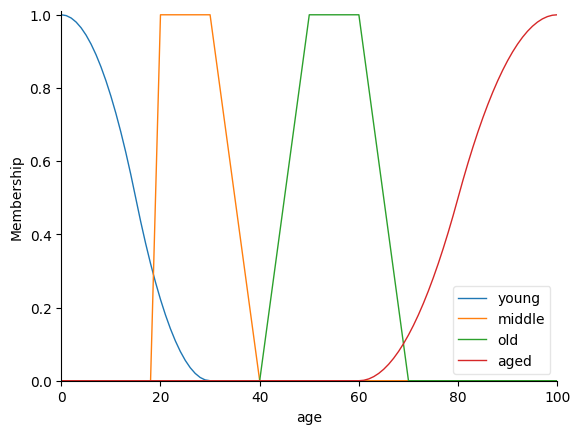

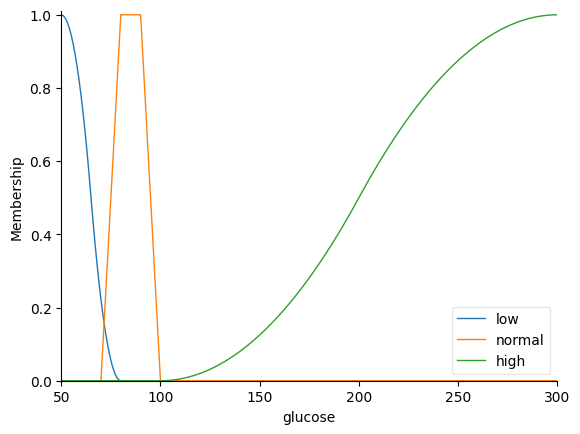

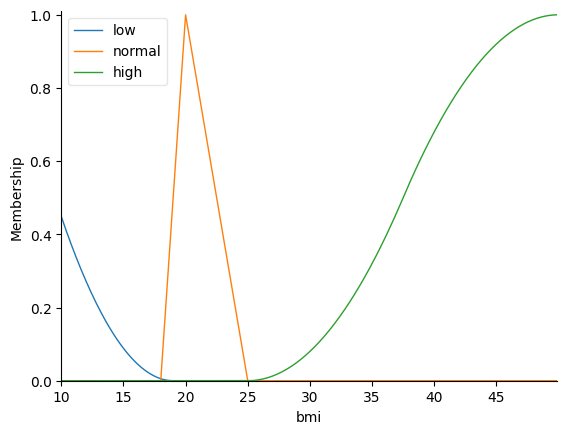

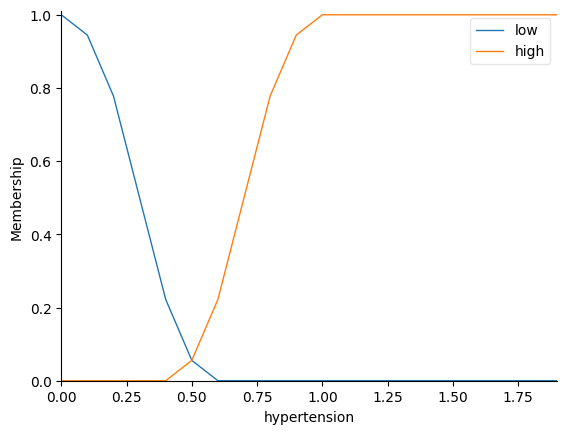

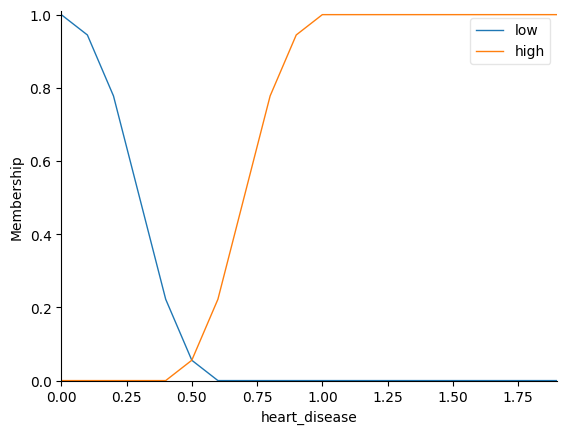

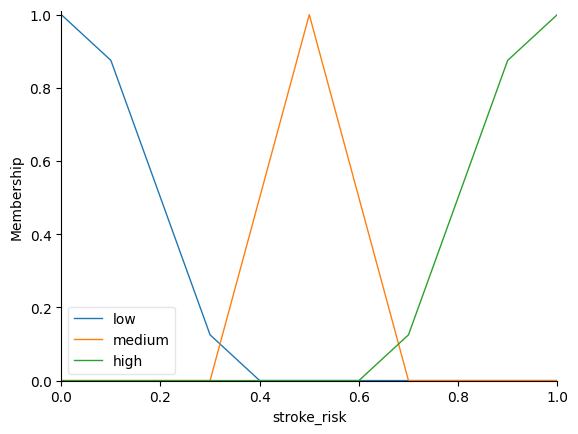

In [142]:
import matplotlib.pyplot as plt

# возраст
age['young'] = fuzzy.zmf(age.universe, 0, 30)
age['middle'] = fuzzy.trapmf(age.universe, [18, 20, 30, 40])
age['old'] = fuzzy.trapmf(age.universe, [40, 50, 60, 70])
age['aged'] = fuzzy.smf(age.universe, 60, 100)  

# сахар
glucose['low'] = fuzzy.zmf(glucose.universe, 50, 80)
glucose['normal'] = fuzzy.trapmf(glucose.universe, [70, 80, 90, 100])
glucose['high'] = fuzzy.smf(glucose.universe, 100, 300)

# ИМТ
bmi['low'] = fuzzy.zmf(bmi.universe, 0, 19)
bmi['normal'] = fuzzy.trimf(bmi.universe, [18, 20, 25])
bmi['high'] = fuzzy.smf(bmi.universe, 25, 50)

# гипертония
hypertension['low'] = fuzzy.zmf(hypertension.universe, 0, 0.6)
hypertension['high'] = fuzzy.smf(hypertension.universe, 0.4, 1.0)

# пердечный сриступ
heart_disease['low'] = fuzzy.zmf(heart_disease.universe, 0, 0.6)
heart_disease['high'] = fuzzy.smf(heart_disease.universe, 0.4, 1.0)

#риск инсульта
stroke_risk['low'] = fuzzy.zmf(stroke_risk.universe, 0, 0.4)
stroke_risk['medium'] = fuzzy.trimf(stroke_risk.universe, [0.3, 0.5, 0.7])
stroke_risk['high'] = fuzzy.smf(stroke_risk.universe, 0.6, 1.0)


age.view()
glucose.view()
bmi.view()
hypertension.view()
heart_disease.view()
stroke_risk.view()



<p style="margin: 15px;">
а теперь формируем базу нечетких правил :D
</p>


<style>
  .blur-text {
    filter: blur(3px);
    transition: filter 0.3s ease-in-out;
    cursor: pointer;
  }

  .blur-text.clear {
    filter: blur(0);
  }
</style>

<p class="blur-text" onclick="this.classList.toggle('clear')" style="margin: 15px;">
  ну.... с написанием правил мне чат гпт помог, ну а что, у меня 5 входных переменных... я не знала, на что наткнусь, когда дойду до этого момента, поэтому... спасибо чату
</p>

In [143]:
rules = []

ages = ['young', 'middle', 'old', 'aged']
hypertension_levels = ['low', 'high']
glucose_levels = ['low', 'normal', 'high']
bmi_levels = ['low', 'normal', 'high']
heart_disease_levels = ['low', 'high']

for ag in ages:
    for hl in hypertension_levels:
        for gl in glucose_levels:
            for bm in bmi_levels:
                for hd in heart_disease_levels:
                    # Определяем уровень риска
                    if ag in ['aged', 'old'] and hl == 'high' and gl == 'high' and bm == 'high' and hd == 'high':
                        risk = 'high'
                    elif ag in ['middle', 'old'] and hl == 'high' and gl == 'high' and bm in ['normal', 'high']:
                        risk = 'high'
                    elif ag == 'young' and hl == 'low' and gl == 'low' and bm == 'low' and hd == 'low':
                        risk = 'low'
                    elif gl == 'normal' and bm == 'normal' and hd == 'low':
                        risk = 'low'
                    elif ag == 'middle' and hl == 'low' and gl == 'low' and bm == 'low':
                        risk = 'low'
                    else:
                        risk = 'medium'
                    
                    # Создаем правило
                    rule = control.Rule(
                        age[ag] & hypertension[hl] & glucose[gl] & bmi[bm] & heart_disease[hd],
                        stroke_risk[risk]
                    )
                    rules.append(rule)


d:\code\mai\labs\AIM-PIbd-31-Bakalskaya-E-D\lab_7\.venv\Lib\site-packages\skfuzzy\control\controlsystem.py:135: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


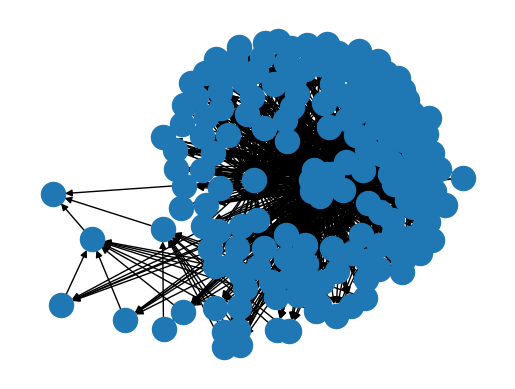

In [144]:
stroke_ctrl = control.ControlSystem(
    rules
)

stroke_simulation = control.ControlSystemSimulation(stroke_ctrl)
stroke_ctrl.view()

In [145]:

from pprint import pprint

def fuzzy_pred(row):
    stroke_simulation.input["age"] = row["age"]
    stroke_simulation.input["glucose"] = row["avg_glucose_level"]
    stroke_simulation.input["bmi"] = row["bmi"]
    stroke_simulation.input["hypertension"] = row["hypertension"]
    stroke_simulation.input["heart_disease"] = row["heart_disease"]


    stroke_simulation.compute()
    return stroke_simulation.output["stroke_risk"]

stroke_simulation.input["age"] = 72
stroke_simulation.input["glucose"] = 220
stroke_simulation.input["bmi"] = 30
stroke_simulation.input["hypertension"] = 1
stroke_simulation.input["heart_disease"] = 0

stroke_simulation.compute()
stroke_simulation.print_state()
stroke_predict = stroke_simulation.output["stroke_risk"]
print(stroke_predict)

# result = data.copy()
# result = result.sample(frac=0.01)
# result["stroke_predicted"] = result.apply(fuzzy_pred, axis=1)
# # result["stroke_predicted"] = result['stroke'].apply(lambda x: 1 if x> 0.5 else 0, axis=1)

# print(result.head())

 Antecedents 
Antecedent: age                     = 72
  - young                           : 0.0
  - middle                          : 0.0
  - old                             : 0.0
  - aged                            : 0.18
Antecedent: hypertension            = 1
  - low                             : 0.0
  - high                            : 1.0
Antecedent: glucose                 = 220
  - low                             : 0.0
  - normal                          : 0.0
  - high                            : 0.6799999999999999
Antecedent: bmi                     = 30
  - low                             : 0.0
  - normal                          : 0.0
  - high                            : 0.08000000000000002
Antecedent: heart_disease           = 0
  - low                             : 1.0
  - high                            : 0.0

 Rules 
RULE #0:
  IF (((age[young] AND hypertension[low]) AND glucose[low]) AND bmi[low]) AND heart_disease[low] THEN stroke_risk[low]
	AND aggregation function

In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Создаем копию данных и прогнозируем значения
result = data.copy()
result = result.sample(frac=0.01)  # Берем 1% данных для теста
result["stroke_predicted"] = result.apply(fuzzy_pred, axis=1)

# Истинные и предсказанные значения
y_true = result["stroke"]
y_pred = result["stroke_predicted"]

# Вычисляем метрики
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Выводим результаты
print(f"MAE: {mae:.4f}") # ближе к 0 - лучше
print(f"MSE: {mse:.4f}") # ближе к 0 - лучше
print(f"RMSE: {rmse:.4f}") # тоже
print(f"R² Score: {r2:.4f}") # а тут ближе к 1 - лучше

MAE: 0.4596
MSE: 0.2265
RMSE: 0.4760
R² Score: -3.0918


#### ну короче... противоречивые результаты, но в основном они говорят о том, что модель данная - такое себе. в чем я, собственно, не знаю, согласна или нет... по показателям людей здесь и правда мог бы быть инсульт, ведь риск его развития есть, а если вероятность его развития больше 0,2 вроде, то это высокая вероятность уже... короче сложно такие задачи решать с помощью нечетких переменных